In [1]:
import os
from game_simulation1 import *
import matplotlib.pyplot as plt

### (k+1) SA_EA

In [2]:
def sa_esk(iterations,num_games,k,tau,features):
      W = [(np.zeros(7),100 * np.ones(7), simulation(np.zeros(7),features,3)) for i in range(k)]

      learning_curve =[]
      std=[]

      for t in range(iterations):
        if t%5==0:
           Wp = []
           for i in range(k):
               wp,Sigmap,scorep = W[i]
               scorep = simulation(wp,features,3)
               Wp.append((wp,Sigmap,scorep))
           W=Wp
        w,Sigma,score = W[np.random.randint(0, k)]
        new_Sigma = Sigma * np.exp(tau * np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w))))
        new_w = w+new_Sigma*np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w)))
        new_score  = simulation(new_w,features,3)
        W.append((new_w,new_Sigma,new_score))
        W.sort(reverse=True, key=lambda x: x[2])
        W = W[:k]
        game_scores = [simulation(W[0][0],features) for _ in range(num_games)]
        std.append(np.std(game_scores))
        learning_curve.append(np.mean(game_scores))

        if t%20 ==0:
          print("Iteration {}: Average score of best samples: {},{}".format(t+1, simulation2(W[0][0],features),W[0][2]))
      return learning_curve,std,W

### Evaluation using features DU Strategy 2

In [4]:
np.random.seed(42)
learning_curve_sa_es,std_WN,W=sa_esk(300,1,5,0.1,1)

Iteration 1: Average score of best samples: 26.0,2.0
Iteration 21: Average score of best samples: 539.0,303.33333333333337
Iteration 41: Average score of best samples: 1091.0,335.0
Iteration 61: Average score of best samples: 406.0,214.99999999999997
Iteration 81: Average score of best samples: 195.0,443.3333333333333
Iteration 101: Average score of best samples: 199.0,509.99999999999994
Iteration 121: Average score of best samples: 77.0,442.6666666666667
Iteration 141: Average score of best samples: 147.0,628.0
Iteration 161: Average score of best samples: 158.0,490.6666666666667
Iteration 181: Average score of best samples: 535.0,1028.3333333333335
Iteration 201: Average score of best samples: 535.0,323.0
Iteration 221: Average score of best samples: 1254.0,1039.0
Iteration 241: Average score of best samples: 1490.0,756.6666666666666
Iteration 261: Average score of best samples: 2390.0,804.0
Iteration 281: Average score of best samples: 2866.0,697.6666666666667


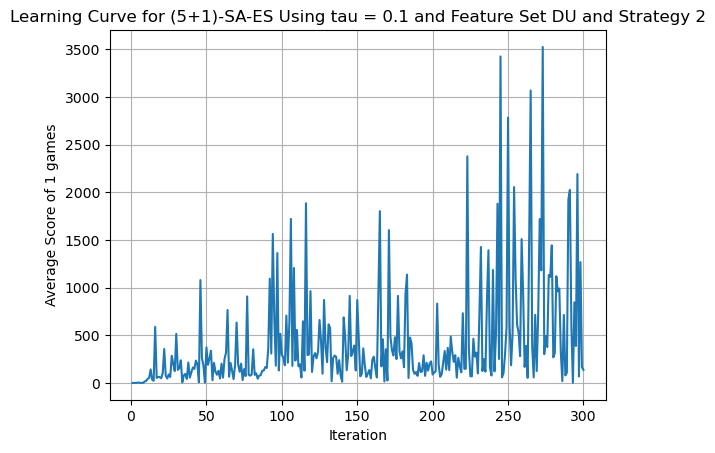

<Figure size 640x480 with 0 Axes>

In [5]:
plt.plot(range(1, len(learning_curve_sa_es) + 1), learning_curve_sa_es, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of 1 games')
plt.title('Learning Curve for (5+1)-SA-ES Using tau = 0.1 and Feature Set DU and Strategy 2')
plt.grid(True)
plt.show()
plt.savefig('learning_curve_5p1_SAES_DU_Strategy2.png', dpi=300, bbox_inches='tight')